In [1]:
#feito por: Luana Ferreira Marques da Silva

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

%matplotlib inline

In [3]:
def jacobi(A, b, tol, x = None, maxIt = None):
    b = b.flatten().reshape((b.shape[0], 1))
    P = np.diag(np.diag(A))
    iP = np.linalg.inv(P)
    
    if x is None:
        x = np.zeros(b.shape)
        
    if maxIt is None:
        r = b - A.dot(x)
        er = max(np.abs(r))

        it = 0

        if(er <= tol):
            return x, it, er[0]
    
        while(er > tol):
            r = b - A.dot(x)
            er = max(np.abs(r))    

            if(er <= tol):
                return x, it, er[0]
            
            x = x + iP.dot(r)
            it += 1
    else:
        for it in range(max):
            r = b - A.dot(x)
            er = max(np.abs(r))            
            if(er <= tol):
                return x, it, er[0]
            
            x = x - iP.dot(r)
    
    return x, maxIt, er

In [4]:
def seidel(a,b,x = None):
    if x is None:
        x = np.zeros(b.shape)

    n=len(a)
    for j in range(0,n):
        d=b[j]
        for i in range(0,n):
            if(j!=i):
                d-=a[j][i] * x[i]
        x[j] = d / a[j][j]
    return x

In [5]:
def bySeidel():
    mA = np.array([[-4, 1, 0, 1, 0], [1, -4, 1, 0, 1], [0, 1, -4, 1, 0], [1, 0, 1, -4, 1], [0, 1, 0, 1, -4]])
    b = np.array([1, 1, 1, 1, 1])
    tols = [10**-2, 10**-4, 10**-6, 10**-8, 10**-10]    
    x = None
    iteSeidel = []
    xSeidel = []
    errSeidel = []
    err = sys.maxsize
    itSeidel = 0
    
    for i in tols:
        while err > i:
            x = seidel(mA,b, x)
            itSeidel += 1

            err = b-(mA.dot(x))
            err = max(np.abs(err))
        errSeidel.append([err])
        iteSeidel.append(itSeidel)
        xSeidel.append(x)
        
    fig, ax = plt.subplots() 
    ax.set_axis_off() 
    table = ax.table( 
        cellText = [['Erro final']] + errSeidel,
        rowLabels = ['Iterações'] + iteSeidel,
        rowColours =["pink"] * len(errSeidel) * 2,
        cellLoc ='center',
        loc ='upper left')
    
    ax.set_title('Erros por iteracao: SEIDEL', fontweight ="bold") 

    plt.show()

In [6]:
def byJacobi():
    mA = np.array([[-4, 1, 0, 1, 0], [1, -4, 1, 0, 1], [0, 1, -4, 1, 0], [1, 0, 1, -4, 1], [0, 1, 0, 1, -4]])
    b = np.array([1, 1, 1, 1, 1])
    tols = [10**-2, 10**-4, 10**-6, 10**-8, 10**-10]    
    x = None
    
    iteJacobi = []
    xJacobi = []
    errorJacobi = []
    x = None
    for i in tols:            
        x, it, errJacobi = jacobi(mA, b, i)    
        iteJacobi.append(it)
        xJacobi.append(x)
        errorJacobi.append([errJacobi])    
        
    fig, ax = plt.subplots() 
    ax.set_axis_off() 
    table = ax.table( 
        cellText = [['Erro final']] + errorJacobi,
        rowLabels = ['Iterações'] + iteJacobi,
        rowColours =["red"]*len(errorJacobi)*2,
        cellLoc ='center',
        loc ='upper left')

    ax.set_title('Erros por iteração: JACOBI',fontweight ="bold") 

    plt.show()


In [7]:
def exercicio1(opt):
    if(opt == 1):
        byJacobi()
    elif(opt == 2):
        bySeidel()
    

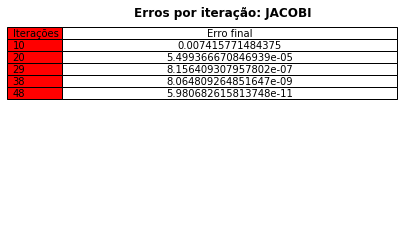

In [8]:
exercicio1(1)

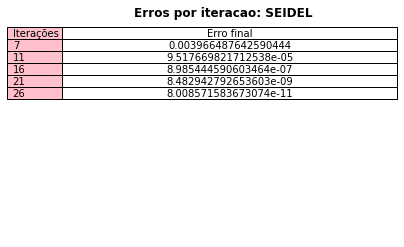

In [9]:
exercicio1(2)

In [13]:
A = hilbert(5) + np.eye(5) * .5
xa = [0.01526, 0.49922, 0.78386, 0.97474, 1.11259]
b = np.array([1, 1, 1, 1, 1])

tol = 10**-3

xb, itb, errJacobib = jacobi(A, b, tol)

C:\Users\Luana\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
C:\Users\Luana\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Luana\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


In [11]:
A = hilbert(5) + np.eye(5) * .5
xa = [0, 0, 0,0, 0]

tol = 10**-3
flag = True
itb = 0
while flag:
    xc = seidel(A,b,xa)
    itb += 1
    print(xc)
    errb = b-(A.dot(xa))
    errb = max(np.abs(errb))
    print(errb)
    if(errb <= tol):
        break

print(itb)   

[0.6666666666666666, 0.8000000000000002, 0.8253968253968254, 0.8334156378600824, 0.8365787122929981]
1.0508019270558955
[-0.033867951370596984, 0.6053662276582912, 0.8593341561223721, 0.9949318460987698, 1.077955716979956]
0.08101707511028389
[-0.03563462497152442, 0.509205741686507, 0.8068016067116293, 0.9922206137373398, 1.117594394632381]
0.058341165349345636
[0.0032594852613726335, 0.49435200060625, 0.7861415148305952, 0.979365089778849, 1.1163756042560335]
0.01777120689869871
[0.015106956527171736, 0.49677062923638793, 0.782945637675149, 0.9750708253632896, 1.1134640844665795]
0.0021430754702158605
[0.016114855281745333, 0.4987375805479028, 0.7833798348966015, 0.9745204835264274, 1.1126088546975843]
0.0008195766498935164
6


In [12]:
A = hilbert(5) + np.eye(5) * .5
I = np.diagflat([1,1,1,1,1])
print(I)

D = np.diag(A)
print(D)

B = I - D*A

auvalores = np.linalg.eigvals(B)
print(auvalores)
#percebemos que como modulo de -1.57082452 é 1.57082452, não cumprimos a ordem do teorema que diz que
#o maior autovalor de B deve ser menor que 1 para conseguirmos convergir para solução.

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
[1.5        0.83333333 0.7        0.64285714 0.61111111]
[-1.57082452  0.38835333  0.60950344  0.66369418  0.68810703]
